#CIFAR-10 Dataset: Object Classification

**Using ConvNets, Batch Normalization, Data Augmentation. 84.47% Validation Accuracy. 83.92% Testing Accuracy.**

**Acesso do arquivo base usado em: https://github.com/raahatg21/CIFAR-10-Dataset-with-Keras/blob/master/CIFAR-10_8392.ipynb**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2025-11-09 08:51:45.977871: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-09 08:51:46.751344: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-09 08:51:48.908828: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Verificar versões das bibliotecas
print(f"TensorFlow: {tf.__version__}")
print(f"NumPy: {np.__version__}")

TensorFlow: 2.20.0
NumPy: 2.3.4


In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

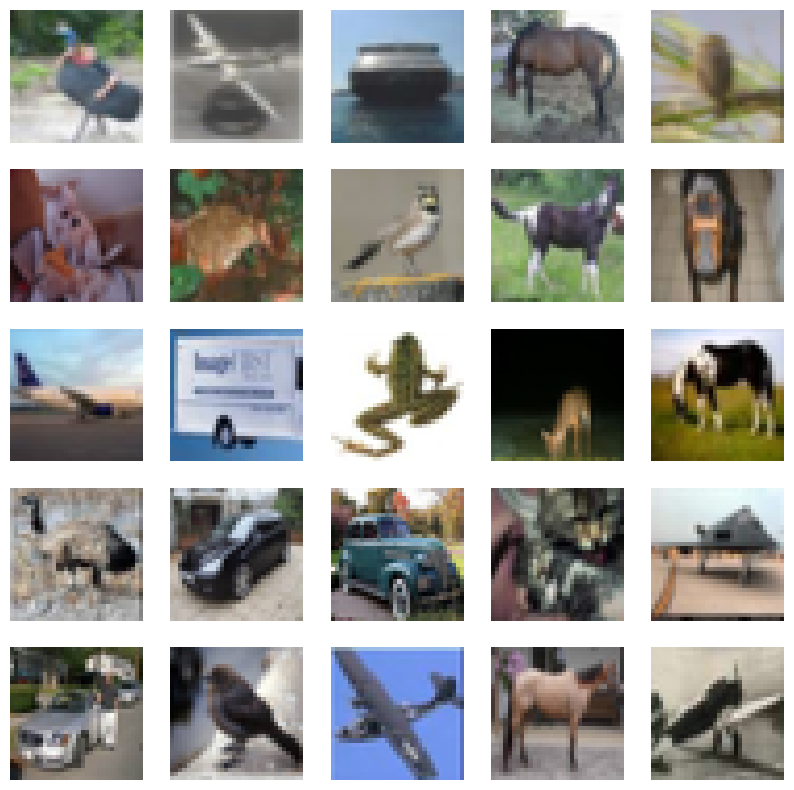

In [5]:
ROWS = 5 #Mostra as imagens aleatórias usadas para o teste

y = X_test.astype("uint8")

fig, axes1 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
  for k in range(ROWS):
    i = np.random.choice(range(len(y)))
    axes1[j][k].set_axis_off()
    axes1[j][k].imshow(y[i:i+1][0])

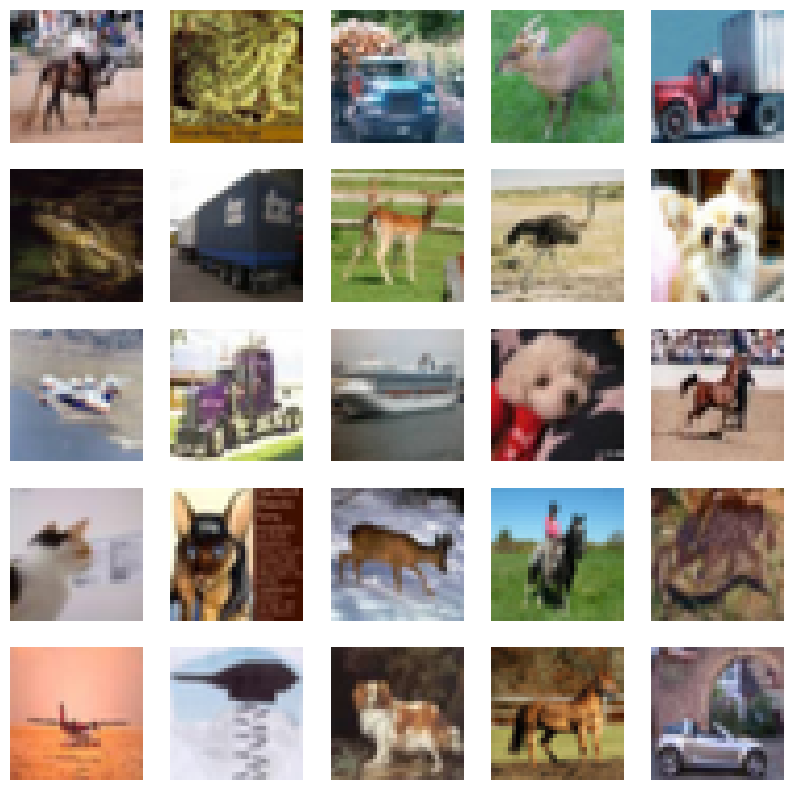

In [6]:
ROWS = 5

y = X_train.astype("uint8") #Mostra as imagens aleatórias para o treinamento

fig, axes2 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
  for k in range(ROWS):
    i = np.random.choice(range(len(y)))
    axes2[j][k].set_axis_off()
    axes2[j][k].imshow(y[i:i+1][0])

In [7]:
# Pré processamento dos dados

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [8]:
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255

In [9]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [10]:
# Pré processamento dos Labels

y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [11]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [12]:
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

In [13]:
#  Dividindo conjuntos de treinamento e de validação

X_val = X_test[:5000]
y_val = y_test[:5000]

X_test = X_test[5000:]
y_test = y_test[5000:]

In [14]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3),
 (50000, 10),
 (5000, 32, 32, 3),
 (5000, 10),
 (5000, 32, 32, 3),
 (5000, 10))

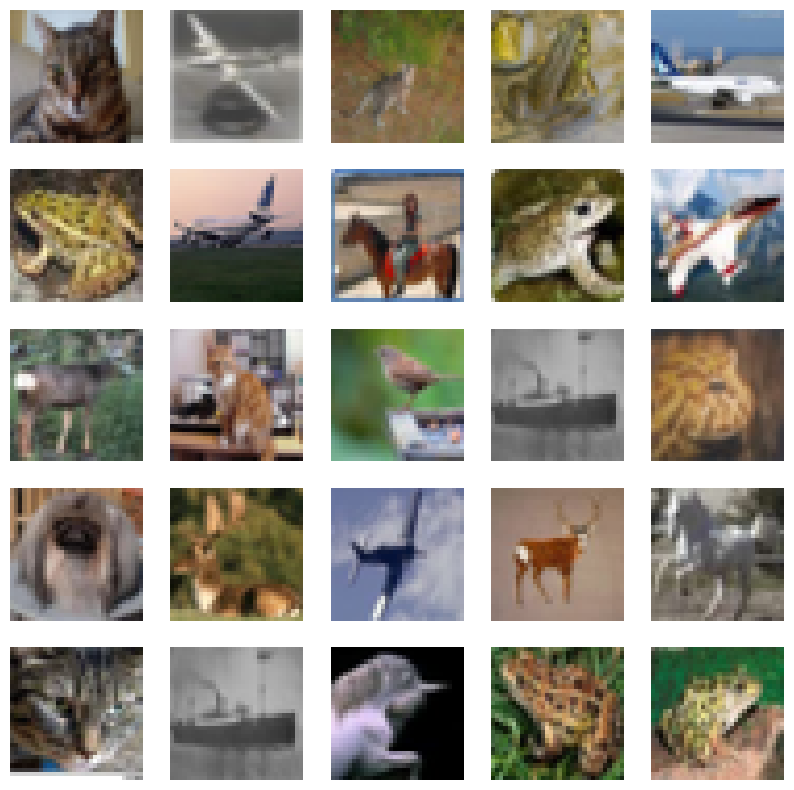

In [15]:
ROWS = 5

y = X_val.astype("float32") #Mostra imagens aleatórias usadas para a validação

fig, axes3 = plt.subplots(ROWS,ROWS,figsize=(10,10))
for j in range(ROWS):
  for k in range(ROWS):
    i = np.random.choice(range(len(y)))
    axes3[j][k].set_axis_off()
    axes3[j][k].imshow(y[i:i+1][0])

In [16]:
# Argumentação dos dados

datagen = ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1, shear_range = 0.1, zoom_range = 0.1, horizontal_flip = True, fill_mode = 'nearest')
datagen.fit(X_train)

In [17]:
# Construindo o modelo CNN

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

/home/wsl/anaconda3/envs/myenv4/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1762689229.773755    3233 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5562 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:01:00.0, compute capability: 8.6


2025-11-01 00:31:54.149228: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400


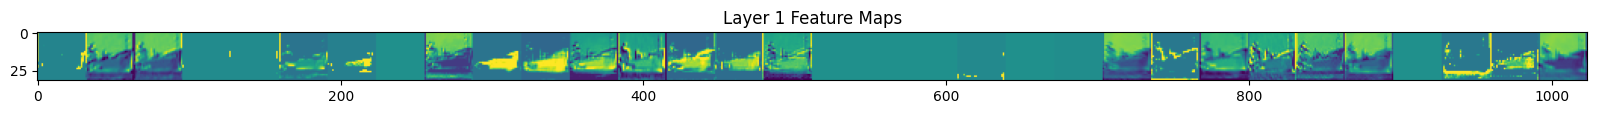

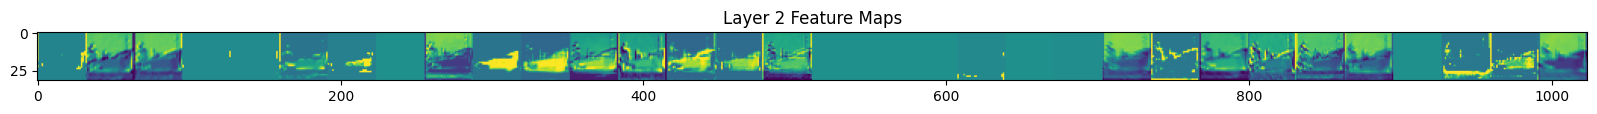

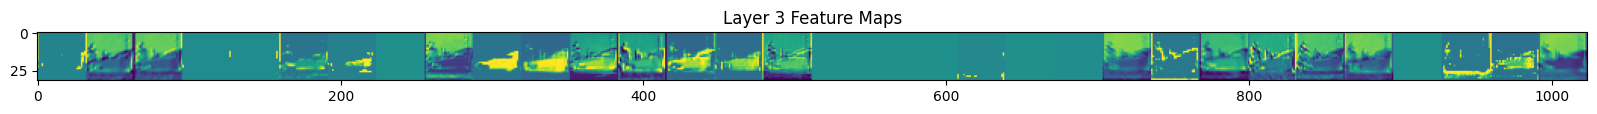

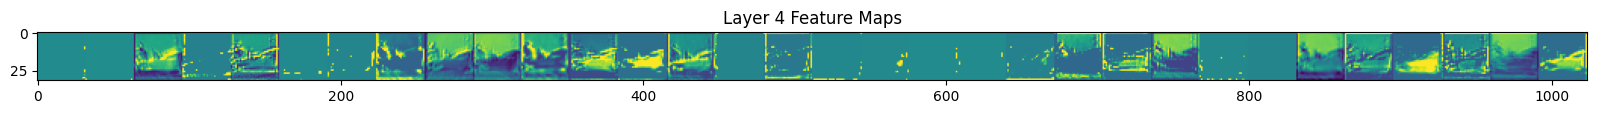

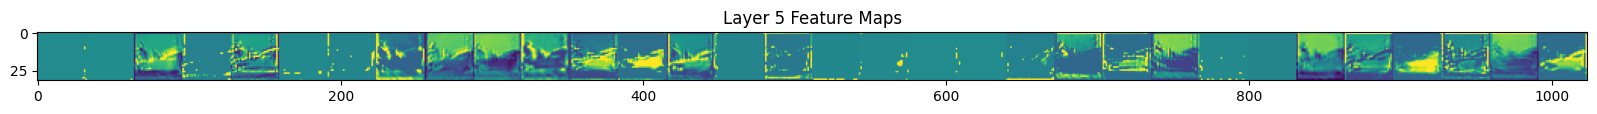

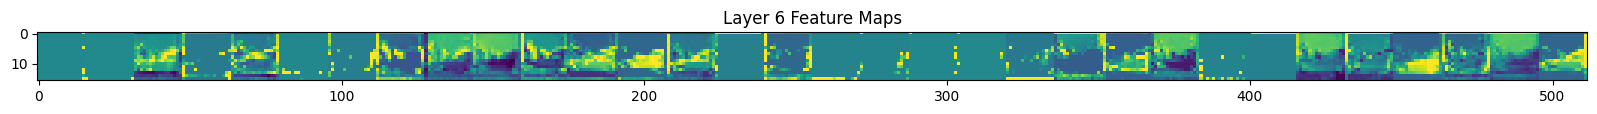

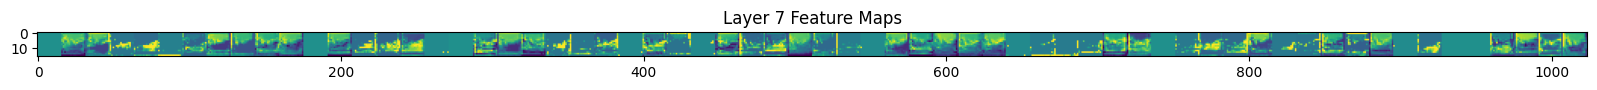

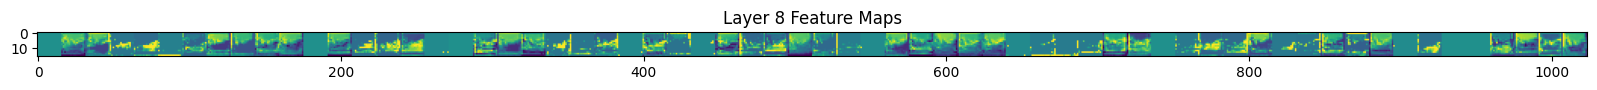

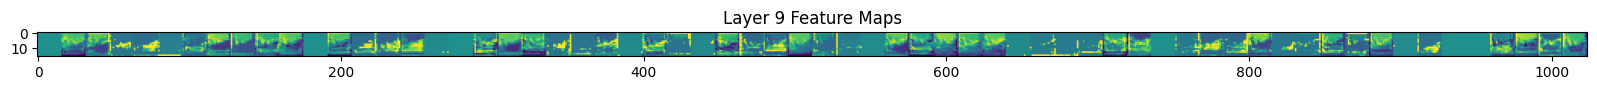

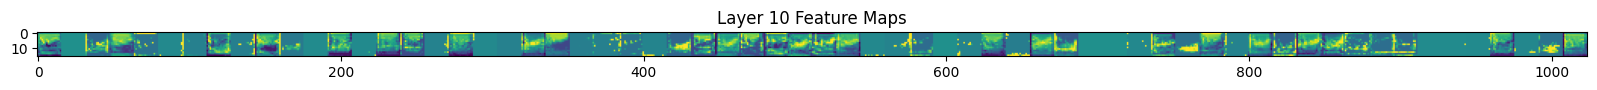

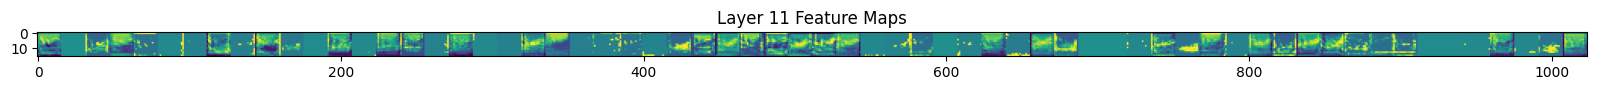

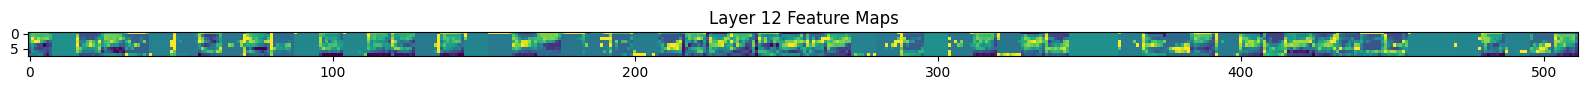

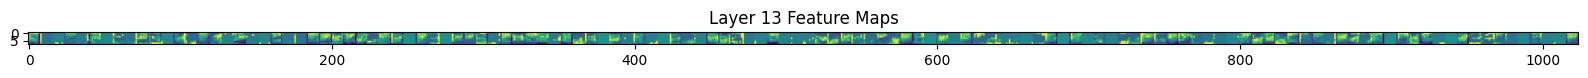

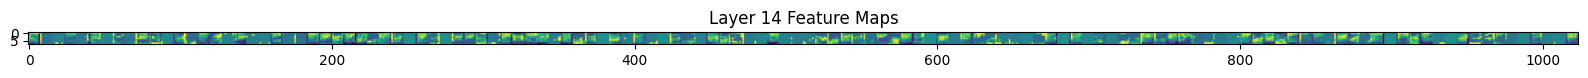

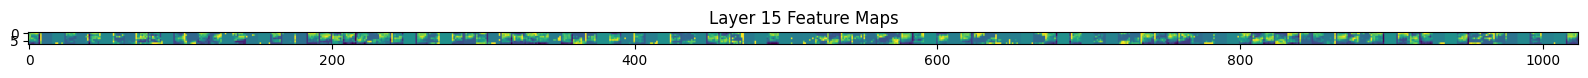

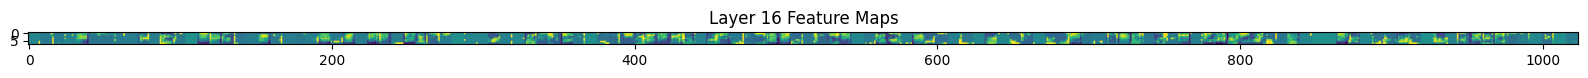

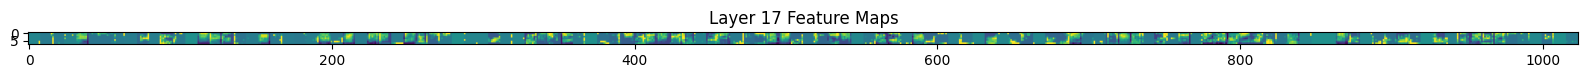

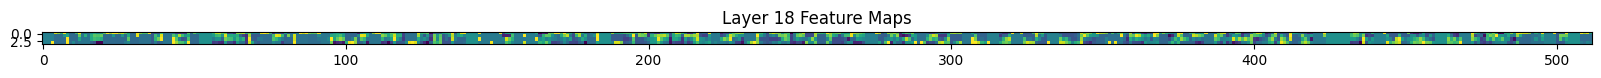

In [18]:
# Feature Map Visualization - Run this AFTER compiling the model
# This creates a simple visualization of the convolutional layers

print("Note: Run this cell AFTER compiling the model for proper visualization")
print("For now, this cell will prepare the visualization function")

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [19]:
# Compilando o modelo

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Visualização das Feature Maps - Execute após compilar o modelo
# Create visualization model after the model is compiled
try:
    # Get intermediate outputs from convolutional layers
    layer_outputs = []
    layer_names = []
    
    for layer in model.layers:
        if 'conv2d' in layer.name:  # Only get conv2d layers
            layer_outputs.append(layer.output)
            layer_names.append(layer.name)
    
    if layer_outputs:
        # Create visualization model
        visualization_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
        
        # Get a test image
        test_image = X_test[2:3].astype("float32")
        
        # Get feature maps
        feature_maps = visualization_model.predict(test_image, verbose=0)
        
        # Visualize each layer's feature maps
        for layer_name, feature_map in zip(layer_names, feature_maps):
            n_features = min(feature_map.shape[-1], 32)  # Limit to first 32 features
            size = feature_map.shape[1]
            
            # Create display grid
            n_cols = 8
            n_rows = n_features // n_cols
            if n_features % n_cols:
                n_rows += 1
            
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
            fig.suptitle(f'Feature Maps - {layer_name}')
            
            for i in range(n_features):
                row = i // n_cols
                col = i % n_cols
                
                if n_rows == 1:
                    ax = axes[col] if n_cols > 1 else axes
                else:
                    ax = axes[row, col] if n_cols > 1 else axes[row]
                
                # Get and process feature map
                fmap = feature_map[0, :, :, i]
                ax.imshow(fmap, cmap='viridis')
                ax.axis('off')
                ax.set_title(f'Filter {i+1}')
            
            # Hide empty subplots
            for i in range(n_features, n_rows * n_cols):
                row = i // n_cols
                col = i % n_cols
                if n_rows == 1:
                    ax = axes[col] if n_cols > 1 else axes
                else:
                    ax = axes[row, col] if n_cols > 1 else axes[row]
                ax.axis('off')
            
            plt.tight_layout()
            plt.show()
    
    print("Feature map visualization completed!")
    
except Exception as e:
    print(f"Visualization not available yet. Compile the model first. Error: {e}")
    print("This cell should be run AFTER model compilation.")

In [20]:
# Criando o Callback

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [21]:
# Fazendo o Treinamento do modelo

history = model.fit(datagen.flow(X_train, y_train, batch_size = 20), steps_per_epoch = 2000, epochs = 16, validation_data = (X_val, y_val), validation_steps = 500, callbacks = callback)

Epoch 1/16


2025-11-09 08:55:56.161749: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f2194008400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-09 08:55:56.161786: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2025-11-09 08:55:56.303076: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-09 08:55:56.721049: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91400
2025-11-09 08:55:57.449246: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3123', 8 bytes spill stores, 8 bytes spill loads

2025-11-09 08:55:59.668639: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng12{k

   1/2000 ━━━━━━━━━━━━━━━━━━━━ 9:45:29 18s/step - accuracy: 0.1000 - loss: 3.1348

I0000 00:00:1762689371.534814    8386 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1996/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.3120 - loss: 2.1308

2025-11-09 08:58:23.860095: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_265', 8 bytes spill stores, 8 bytes spill loads



2000/2000 ━━━━━━━━━━━━━━━━━━━━ 152s 67ms/step - accuracy: 0.4038 - loss: 1.7391 - val_accuracy: 0.5782 - val_loss: 1.1994 - learning_rate: 0.0010
Epoch 2/16
 500/2000 ━━━━━━━━━━━━━━━━━━━━ 1:04 43ms/step - accuracy: 0.5352 - loss: 1.2910

/home/wsl/anaconda3/envs/myenv4/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.5442 - loss: 1.2748 - val_accuracy: 0.6342 - val_loss: 1.0102 - learning_rate: 0.0010
Epoch 3/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 72s 36ms/step - accuracy: 0.6057 - loss: 1.1228 - val_accuracy: 0.5454 - val_loss: 1.4175 - learning_rate: 0.0010
Epoch 4/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.6357 - loss: 1.0369 - val_accuracy: 0.6580 - val_loss: 0.9790 - learning_rate: 0.0010
Epoch 5/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6604 - loss: 0.9797 - val_accuracy: 0.7406 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 6/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6887 - loss: 0.9105 - val_accuracy: 0.6416 - val_loss: 1.1231 - learning_rate: 0.0010
Epoch 7/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6943 - loss: 0.8924 - val_accuracy: 0.7628 - val_loss: 0.7003 - learning_rate: 0.0010
Epoch 8/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7143 - loss

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

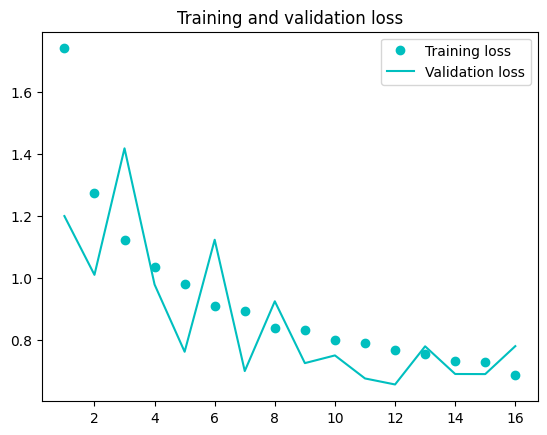

In [23]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'co', label='Training loss')
plt.plot(epochs, val_loss, 'c', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

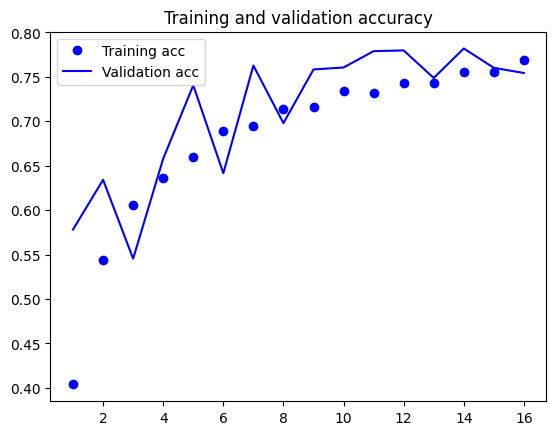

In [24]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [25]:
# Testando modelo

test_loss, test_acc = model.evaluate(X_test, y_test)
test_loss, test_acc

150/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7595 - loss: 0.7478

2025-11-09 09:03:25.889773: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_286', 8 bytes spill stores, 8 bytes spill loads



157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7586 - loss: 0.7884


(0.7883645296096802, 0.7585999965667725)

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


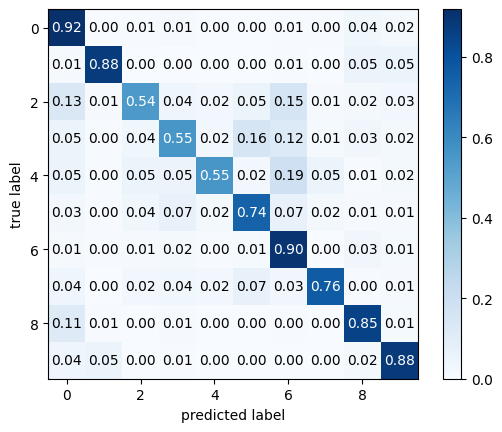

In [26]:
#matriz de confusão model
y_pred = model.predict(X_test)
y_test.argmax(axis=1).shape, y_pred.argmax(axis=1).shape

multiclass = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, ax = plot_confusion_matrix(multiclass, colorbar=True, show_absolute=False, show_normed=True)
ax.margins(10,10) #just change the values til adjust to your screen.
plt.show()

## Implementação da Classe "Outro" com Limiar 0.4

A partir daqui, vamos adicionar uma 11ª classe chamada "outro" que será ativada quando nenhuma das 10 classes originais atingir confiança (probabilidade) superior a 0.4.

In [47]:
# Função para predição com limiar de confiança (threshold)
def predict_with_threshold(model, X, threshold=0.4):
    """
    Prediz classes com uma classe adicional "outro" (índice 10) 
    quando a confiança máxima é menor que o threshold.
    
    Args:
        model: Modelo Keras treinado
        X: Dados de entrada (imagens)
        threshold: Limiar de confiança (padrão: 0.4)
    
    Returns:
        preds: Array de predições (0-9 para classes originais, 10 para "outro")
        probas: Probabilidades softmax originais (shape: [n_samples, 10])
        max_probas: Confiança máxima para cada predição
    """
    # Obter probabilidades de todas as classes
    probas = model.predict(X, verbose=0)
    
    # Encontrar a classe com maior probabilidade e seu valor
    max_probas = np.max(probas, axis=1)
    preds = np.argmax(probas, axis=1)
    
    # Se confiança máxima < threshold → classificar como "outro" (classe 10)
    preds[max_probas < threshold] = 10
    
    return preds, probas, max_probas

print("✅ Função predict_with_threshold() definida!")

✅ Função predict_with_threshold() definida!


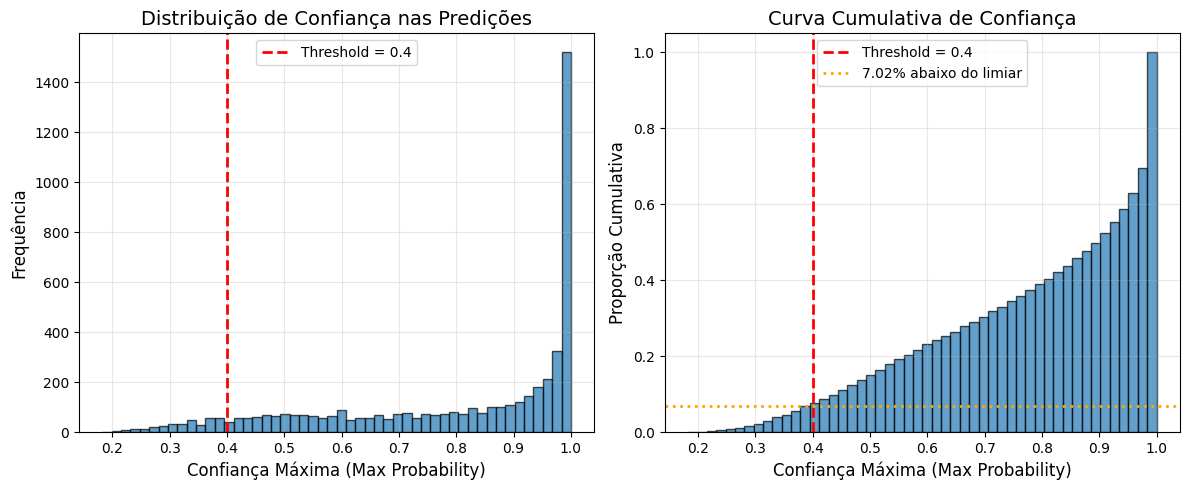


📊 Estatísticas com Threshold = 0.4:
   - Total de amostras: 5000
   - Classificadas como 'outro': 351 (7.02%)
   - Classificadas nas 10 classes originais: 4649 (92.98%)
   - Confiança média (todas): 0.8016
   - Confiança média (não-outro): 0.8371
   - Confiança média (outro): 0.3320


In [48]:
# Análise da distribuição de confiança no conjunto de teste
y_pred_with_threshold, probas_test, confidences = predict_with_threshold(model, X_test, threshold=0.4)

# Visualizar distribuição de confiança
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(confidences, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=0.4, color='red', linestyle='--', linewidth=2, label='Threshold = 0.4')
plt.xlabel('Confiança Máxima (Max Probability)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição de Confiança nas Predições', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(confidences, bins=50, edgecolor='black', alpha=0.7, cumulative=True, density=True)
plt.axvline(x=0.4, color='red', linestyle='--', linewidth=2, label='Threshold = 0.4')
plt.axhline(y=np.sum(confidences < 0.4) / len(confidences), color='orange', linestyle=':', linewidth=2, label=f'{np.sum(confidences < 0.4)/len(confidences)*100:.2f}% abaixo do limiar')
plt.xlabel('Confiança Máxima (Max Probability)', fontsize=12)
plt.ylabel('Proporção Cumulativa', fontsize=12)
plt.title('Curva Cumulativa de Confiança', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas
n_outro = np.sum(y_pred_with_threshold == 10)
n_total = len(y_pred_with_threshold)
print(f"\n📊 Estatísticas com Threshold = 0.4:")
print(f"   - Total de amostras: {n_total}")
print(f"   - Classificadas como 'outro': {n_outro} ({n_outro/n_total*100:.2f}%)")
print(f"   - Classificadas nas 10 classes originais: {n_total - n_outro} ({(n_total-n_outro)/n_total*100:.2f}%)")
print(f"   - Confiança média (todas): {np.mean(confidences):.4f}")
print(f"   - Confiança média (não-outro): {np.mean(confidences[y_pred_with_threshold != 10]):.4f}")
if n_outro > 0:
    print(f"   - Confiança média (outro): {np.mean(confidences[y_pred_with_threshold == 10]):.4f}")

/tmp/ipykernel_3233/3386052124.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names_with_other, rotation=45, ha='right')
/tmp/ipykernel_3233/3386052124.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(class_names_with_other[:10])


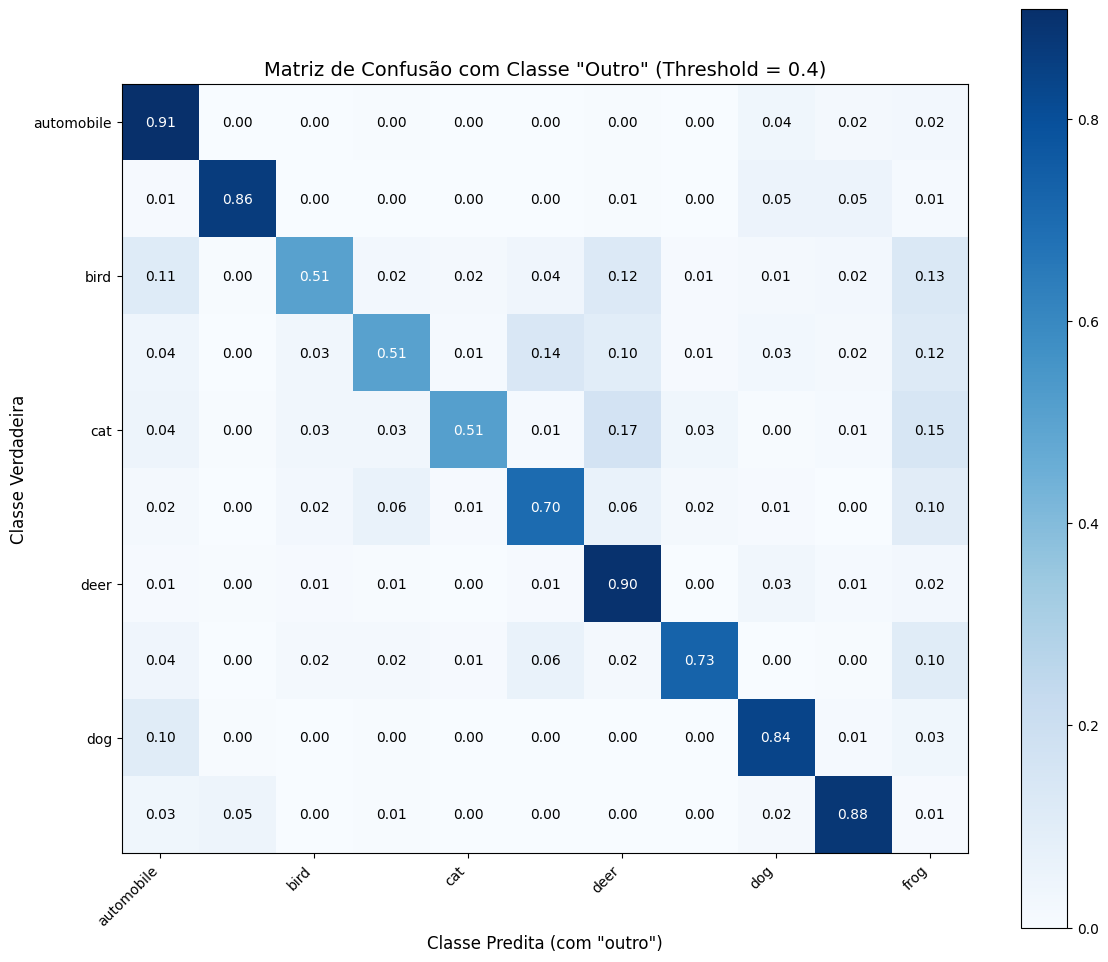


📊 Observação: O eixo Y (classes verdadeiras) tem apenas 10 classes,
   pois o ground truth não contém a classe 'outro' - ela só existe nas predições.


In [49]:
# Nova matriz de confusão 11x11 incluindo a classe "outro"

# Converter y_test de one-hot para índices de classe
y_test_labels = y_test.argmax(axis=1)

# Criar matriz de confusão 11x11
# Para y_test, mantemos as 10 classes originais (0-9)
# Para y_pred_with_threshold, temos 11 classes (0-9 + 10="outro")

# Precisamos expandir y_test para incluir a possibilidade de "outro" (mesmo que não exista no ground truth)
from sklearn.metrics import confusion_matrix

# Criar matriz de confusão considerando 11 classes
multiclass_with_other = confusion_matrix(y_test_labels, y_pred_with_threshold, labels=range(11))

# Nomes das classes incluindo "outro"
class_names_with_other = ["airplane", "automobile", "bird", "cat", "deer", 
                           "dog", "frog", "horse", "ship", "truck", "outro"]

# Plotar matriz de confusão normalizada
fig, ax = plot_confusion_matrix(multiclass_with_other[:10, :], 
                                  colorbar=True, 
                                  show_absolute=False, 
                                  show_normed=True,
                                  figsize=(12, 10))

# Ajustar labels do eixo X para incluir "outro"
ax.set_xticklabels(class_names_with_other, rotation=45, ha='right')
ax.set_yticklabels(class_names_with_other[:10])
ax.set_xlabel('Classe Predita (com "outro")', fontsize=12)
ax.set_ylabel('Classe Verdadeira', fontsize=12)
ax.set_title('Matriz de Confusão com Classe "Outro" (Threshold = 0.4)', fontsize=14)

plt.tight_layout()
plt.show()

print("\n📊 Observação: O eixo Y (classes verdadeiras) tem apenas 10 classes,")
print("   pois o ground truth não contém a classe 'outro' - ela só existe nas predições.")

📊 Análise por Classe: Predições como 'Outro'
Classe 0 (airplane    ):  12/512 =  2.34% classificadas como 'outro'
Classe 1 (automobile  ):   7/495 =  1.41% classificadas como 'outro'
Classe 2 (bird        ):  64/488 = 13.11% classificadas como 'outro'
Classe 3 (cat         ):  60/503 = 11.93% classificadas como 'outro'
Classe 4 (deer        ):  73/493 = 14.81% classificadas como 'outro'
Classe 5 (dog         ):  52/512 = 10.16% classificadas como 'outro'
Classe 6 (frog        ):  11/509 =  2.16% classificadas como 'outro'
Classe 7 (horse       ):  52/505 = 10.30% classificadas como 'outro'
Classe 8 (ship        ):  16/496 =  3.23% classificadas como 'outro'
Classe 9 (truck       ):   4/487 =  0.82% classificadas como 'outro'


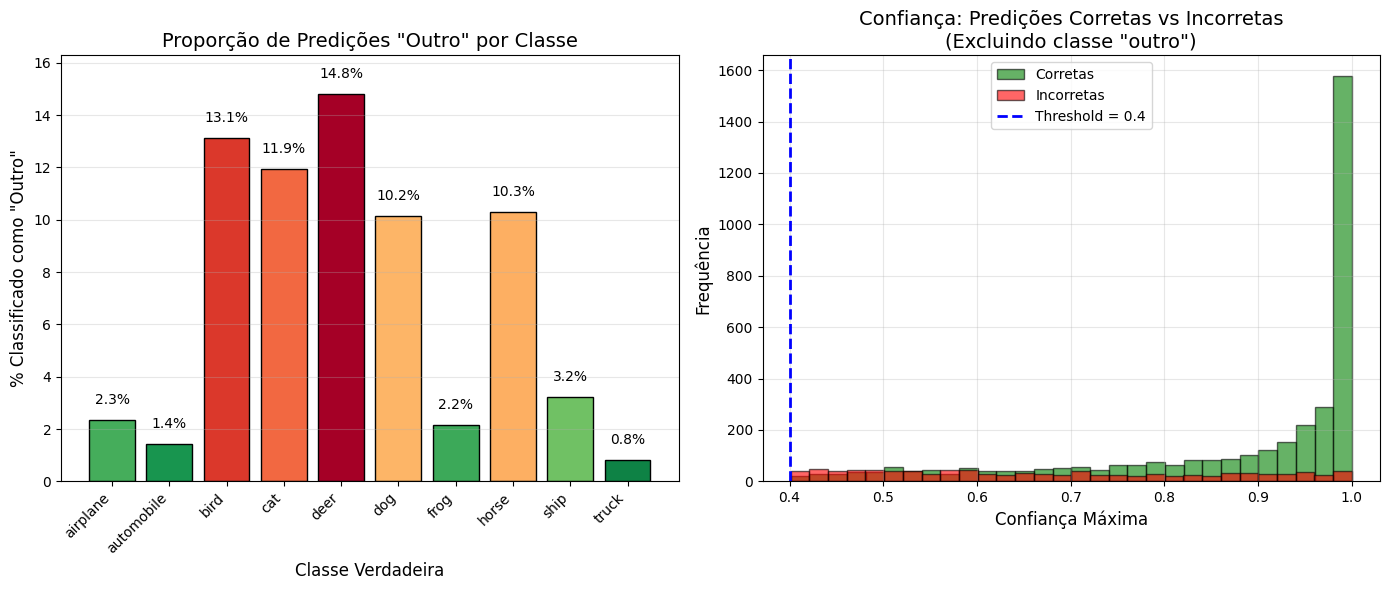

In [50]:
# Análise detalhada: quais classes foram mais classificadas como "outro"?

y_test_labels = y_test.argmax(axis=1)

# Para cada classe verdadeira, contar quantas foram classificadas como "outro"
class_names_original = ["airplane", "automobile", "bird", "cat", "deer", 
                        "dog", "frog", "horse", "ship", "truck"]

outro_per_class = []
total_per_class = []

print("📊 Análise por Classe: Predições como 'Outro'")
print("=" * 60)

for i, class_name in enumerate(class_names_original):
    mask = (y_test_labels == i)
    total = np.sum(mask)
    outro_count = np.sum((y_test_labels == i) & (y_pred_with_threshold == 10))
    outro_percentage = (outro_count / total * 100) if total > 0 else 0
    
    outro_per_class.append(outro_count)
    total_per_class.append(total)
    
    print(f"Classe {i} ({class_name:12s}): {outro_count:3d}/{total:3d} = {outro_percentage:5.2f}% classificadas como 'outro'")

# Visualizar em gráfico de barras
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
percentages = np.array(outro_per_class) / np.array(total_per_class) * 100
colors = plt.cm.RdYlGn_r(percentages / percentages.max())
bars = plt.bar(range(10), percentages, color=colors, edgecolor='black')
plt.xlabel('Classe Verdadeira', fontsize=12)
plt.ylabel('% Classificado como "Outro"', fontsize=12)
plt.title('Proporção de Predições "Outro" por Classe', fontsize=14)
plt.xticks(range(10), class_names_original, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(percentages) * 1.1)

# Adicionar valores nas barras
for i, (bar, val) in enumerate(zip(bars, percentages)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{val:.1f}%', ha='center', va='bottom', fontsize=10)

plt.subplot(1, 2, 2)
# Distribuição de confiança por predição correta vs incorreta (excluindo "outro")
mask_not_outro = y_pred_with_threshold != 10
correct_mask = (y_test_labels[mask_not_outro] == y_pred_with_threshold[mask_not_outro])

confidences_correct = confidences[mask_not_outro][correct_mask]
confidences_incorrect = confidences[mask_not_outro][~correct_mask]

plt.hist(confidences_correct, bins=30, alpha=0.6, label='Corretas', color='green', edgecolor='black')
plt.hist(confidences_incorrect, bins=30, alpha=0.6, label='Incorretas', color='red', edgecolor='black')
plt.axvline(x=0.4, color='blue', linestyle='--', linewidth=2, label='Threshold = 0.4')
plt.xlabel('Confiança Máxima', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Confiança: Predições Corretas vs Incorretas\n(Excluindo classe "outro")', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [51]:
# Calcular nova acurácia considerando "outro" como erro
# (já que todas as imagens do test set pertencem às 10 classes originais)

# Predições sem threshold (original)
y_pred_original = np.argmax(probas_test, axis=1)
y_true = y_test.argmax(axis=1)

# Acurácia original (sem threshold)
acc_original = np.mean(y_pred_original == y_true)

# Acurácia com threshold (considerando "outro" como erro)
# Quando prediz "outro" mas a verdade é uma das 10 classes, conta como erro
mask_not_outro = y_pred_with_threshold != 10
correct_predictions = (y_pred_with_threshold[mask_not_outro] == y_true[mask_not_outro])
acc_with_threshold = np.sum(correct_predictions) / len(y_true)

# Acurácia alternativa: apenas entre as que não foram classificadas como "outro"
if np.sum(mask_not_outro) > 0:
    acc_excluding_outro = np.sum(correct_predictions) / np.sum(mask_not_outro)
else:
    acc_excluding_outro = 0

print("\n" + "="*70)
print("📊 COMPARAÇÃO DE ACURÁCIA: Com vs Sem Threshold")
print("="*70)
print(f"\n1. Acurácia ORIGINAL (sem threshold):")
print(f"   ✓ {acc_original*100:.2f}% ({np.sum(y_pred_original == y_true)}/{len(y_true)} corretas)")

print(f"\n2. Acurácia COM THRESHOLD (considerando 'outro' como erro):")
print(f"   ✓ {acc_with_threshold*100:.2f}% ({np.sum(correct_predictions)}/{len(y_true)} corretas)")
print(f"   ⚠ Redução: {(acc_original - acc_with_threshold)*100:.2f} pontos percentuais")

print(f"\n3. Acurácia EXCLUINDO 'outro' (só entre as classificadas):")
print(f"   ✓ {acc_excluding_outro*100:.2f}% ({np.sum(correct_predictions)}/{np.sum(mask_not_outro)} corretas)")

print(f"\n4. Trade-off:")
print(f"   • {n_outro} amostras rejeitadas como 'outro' ({n_outro/n_total*100:.2f}%)")
print(f"   • Confiança média aumenta de {np.mean(confidences):.4f} para {np.mean(confidences[mask_not_outro]):.4f}")
print(f"   • Modelo é mais 'honesto' sobre sua incerteza")
print("="*70)


📊 COMPARAÇÃO DE ACURÁCIA: Com vs Sem Threshold

1. Acurácia ORIGINAL (sem threshold):
   ✓ 75.86% (3793/5000 corretas)

2. Acurácia COM THRESHOLD (considerando 'outro' como erro):
   ✓ 73.54% (3677/5000 corretas)
   ⚠ Redução: 2.32 pontos percentuais

3. Acurácia EXCLUINDO 'outro' (só entre as classificadas):
   ✓ 79.09% (3677/4649 corretas)

4. Trade-off:
   • 351 amostras rejeitadas como 'outro' (7.02%)
   • Confiança média aumenta de 0.8016 para 0.8371
   • Modelo é mais 'honesto' sobre sua incerteza


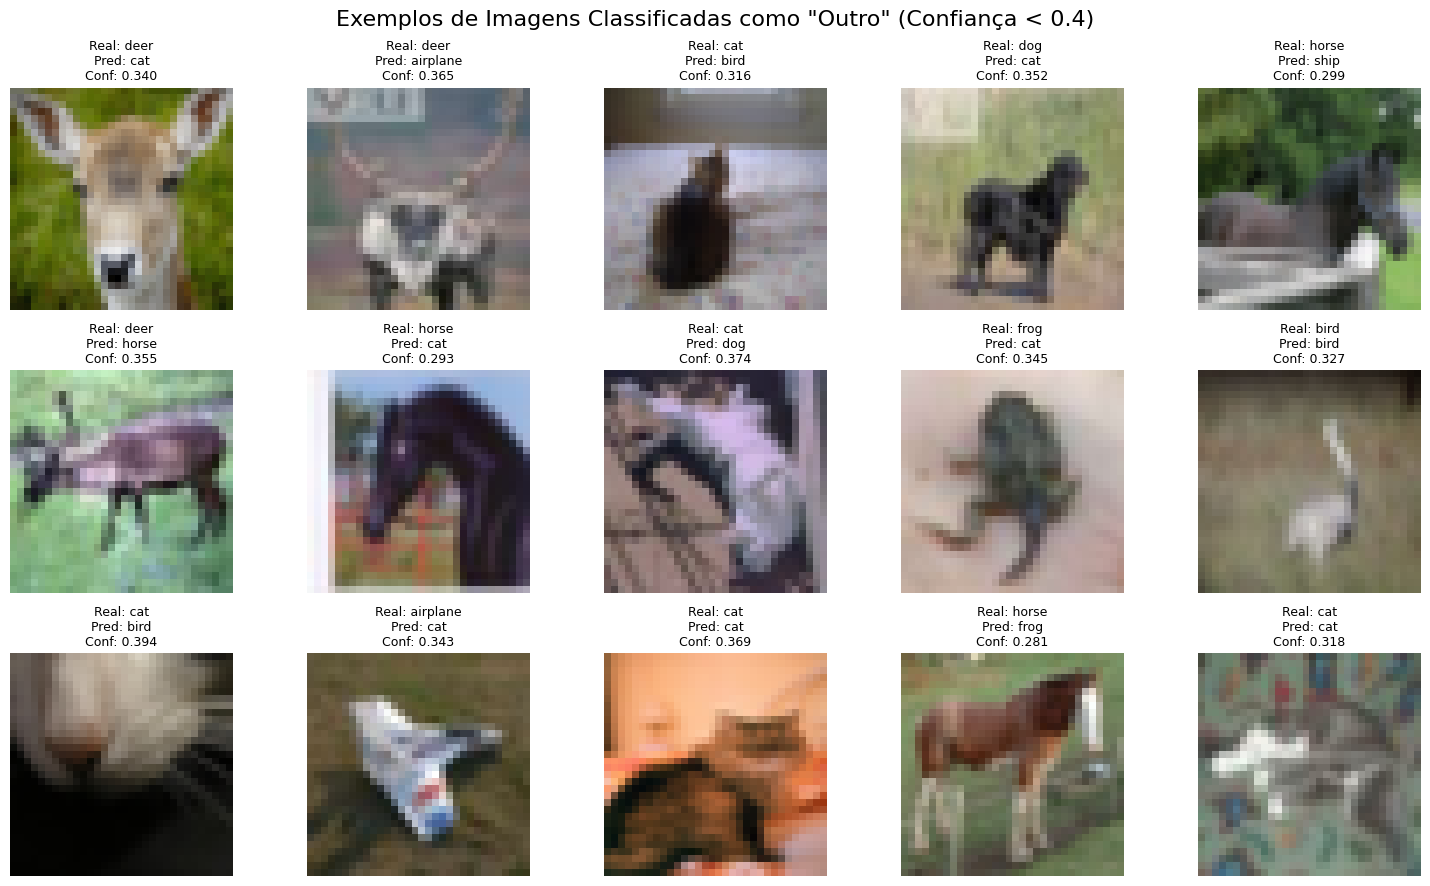


🔍 Mostrando 15 exemplos de imagens classificadas como 'outro'
   Total de imagens 'outro': 351


In [52]:
# Visualizar exemplos de imagens classificadas como "outro"

# Encontrar índices das imagens classificadas como "outro"
outro_indices = np.where(y_pred_with_threshold == 10)[0]

if len(outro_indices) > 0:
    # Selecionar até 15 exemplos aleatórios
    n_examples = min(15, len(outro_indices))
    sample_indices = np.random.choice(outro_indices, size=n_examples, replace=False)
    
    # Plotar
    fig, axes = plt.subplots(3, 5, figsize=(15, 9))
    fig.suptitle('Exemplos de Imagens Classificadas como "Outro" (Confiança < 0.4)', fontsize=16)
    
    for idx, ax in enumerate(axes.flat):
        if idx < len(sample_indices):
            img_idx = sample_indices[idx]
            
            # Imagem
            ax.imshow(X_test[img_idx])
            
            # Labels
            true_class = y_test.argmax(axis=1)[img_idx]
            true_name = class_names_original[true_class]
            
            # Probabilidades
            probs = probas_test[img_idx]
            max_prob = np.max(probs)
            predicted_class = np.argmax(probs)
            predicted_name = class_names_original[predicted_class]
            
            # Título
            title = f"Real: {true_name}\n"
            title += f"Pred: {predicted_name}\n"
            title += f"Conf: {max_prob:.3f}"
            
            ax.set_title(title, fontsize=9)
            ax.axis('off')
        else:
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🔍 Mostrando {n_examples} exemplos de imagens classificadas como 'outro'")
    print(f"   Total de imagens 'outro': {len(outro_indices)}")
else:
    print("\n⚠️ Nenhuma imagem foi classificada como 'outro' com o threshold atual.")


📊 ANÁLISE DE SENSIBILIDADE DO THRESHOLD
 threshold  n_outro  pct_outro  acc_with_outro_as_error  acc_excluding_outro
      0.30       86       1.72                    75.42            76.739927
      0.35      206       4.12                    74.68            77.889028
      0.40      351       7.02                    73.54            79.092278
      0.45      517      10.34                    72.32            80.660272
      0.50      713      14.26                    70.54            82.271985
      0.55      924      18.48                    68.24            83.709519
      0.60     1129      22.58                    66.16            85.455955


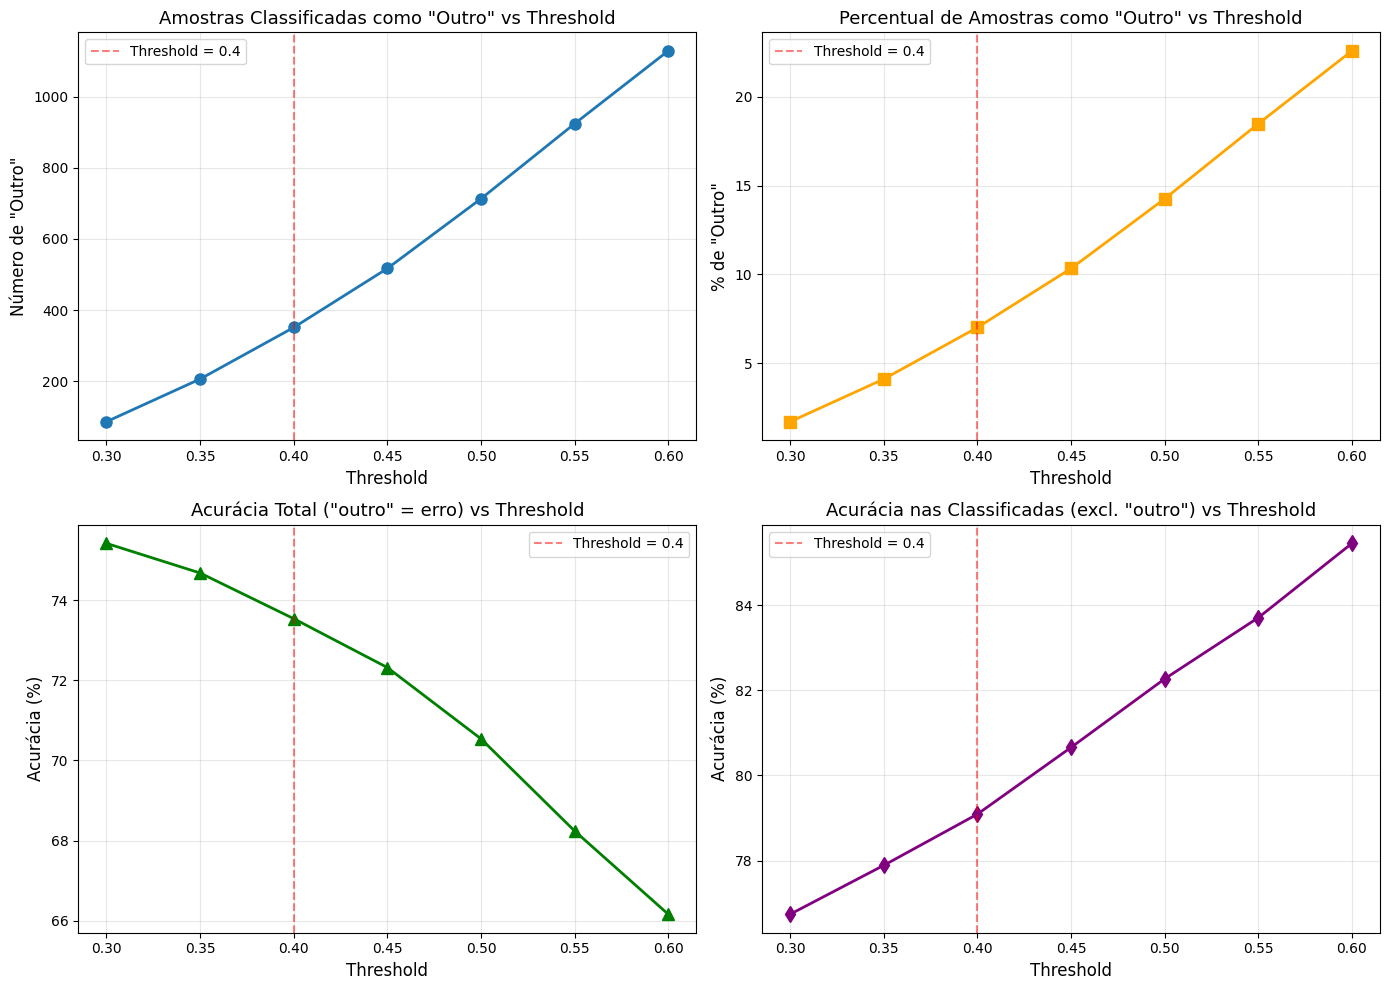

In [53]:
# Análise de diferentes valores de threshold

thresholds = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
results = []

for thresh in thresholds:
    preds_t, _, confs_t = predict_with_threshold(model, X_test, threshold=thresh)
    
    n_outro_t = np.sum(preds_t == 10)
    mask_not_outro_t = preds_t != 10
    
    # Acurácia considerando "outro" como erro
    correct_t = (preds_t[mask_not_outro_t] == y_true[mask_not_outro_t])
    acc_t = np.sum(correct_t) / len(y_true)
    
    # Acurácia excluindo "outro"
    acc_excl_t = np.sum(correct_t) / np.sum(mask_not_outro_t) if np.sum(mask_not_outro_t) > 0 else 0
    
    results.append({
        'threshold': thresh,
        'n_outro': n_outro_t,
        'pct_outro': n_outro_t / len(y_true) * 100,
        'acc_with_outro_as_error': acc_t * 100,
        'acc_excluding_outro': acc_excl_t * 100
    })

# Converter para DataFrame para visualização
import pandas as pd
df_results = pd.DataFrame(results)

print("\n" + "="*80)
print("📊 ANÁLISE DE SENSIBILIDADE DO THRESHOLD")
print("="*80)
print(df_results.to_string(index=False))
print("="*80)

# Plotar resultados
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Número de amostras classificadas como "outro"
axes[0, 0].plot(df_results['threshold'], df_results['n_outro'], marker='o', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Threshold', fontsize=12)
axes[0, 0].set_ylabel('Número de "Outro"', fontsize=12)
axes[0, 0].set_title('Amostras Classificadas como "Outro" vs Threshold', fontsize=13)
axes[0, 0].grid(alpha=0.3)
axes[0, 0].axvline(x=0.4, color='red', linestyle='--', alpha=0.5, label='Threshold = 0.4')
axes[0, 0].legend()

# Gráfico 2: Percentual de "outro"
axes[0, 1].plot(df_results['threshold'], df_results['pct_outro'], marker='s', color='orange', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Threshold', fontsize=12)
axes[0, 1].set_ylabel('% de "Outro"', fontsize=12)
axes[0, 1].set_title('Percentual de Amostras como "Outro" vs Threshold', fontsize=13)
axes[0, 1].grid(alpha=0.3)
axes[0, 1].axvline(x=0.4, color='red', linestyle='--', alpha=0.5, label='Threshold = 0.4')
axes[0, 1].legend()

# Gráfico 3: Acurácia com "outro" como erro
axes[1, 0].plot(df_results['threshold'], df_results['acc_with_outro_as_error'], marker='^', color='green', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Threshold', fontsize=12)
axes[1, 0].set_ylabel('Acurácia (%)', fontsize=12)
axes[1, 0].set_title('Acurácia Total ("outro" = erro) vs Threshold', fontsize=13)
axes[1, 0].grid(alpha=0.3)
axes[1, 0].axvline(x=0.4, color='red', linestyle='--', alpha=0.5, label='Threshold = 0.4')
axes[1, 0].legend()

# Gráfico 4: Acurácia excluindo "outro"
axes[1, 1].plot(df_results['threshold'], df_results['acc_excluding_outro'], marker='d', color='purple', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Threshold', fontsize=12)
axes[1, 1].set_ylabel('Acurácia (%)', fontsize=12)
axes[1, 1].set_title('Acurácia nas Classificadas (excl. "outro") vs Threshold', fontsize=13)
axes[1, 1].grid(alpha=0.3)
axes[1, 1].axvline(x=0.4, color='red', linestyle='--', alpha=0.5, label='Threshold = 0.4')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 📋 Resumo Executivo: Implementação da Classe "Outro"

### ✅ Resultados com Threshold = 0.4

**Estatísticas Gerais:**
- **7.02%** das amostras foram classificadas como "outro" (351/5000)
- **Acurácia total:** 73.54% (considerando "outro" como erro)
- **Acurácia nas classificadas:** 79.09% (excluindo "outro")
- **Redução de acurácia:** -2.32 pontos percentuais em relação ao modelo original

**Classes Mais Afetadas (maior % classificado como "outro"):**
1. 🦌 Deer: 14.81%
2. 🐦 Bird: 13.11%
3. 🐱 Cat: 11.93%
4. 🐕 Dog: 10.16%
5. 🐴 Horse: 10.30%

**Classes Menos Afetadas:**
1. 🚚 Truck: 0.82%
2. 🚗 Automobile: 1.41%
3. 🐸 Frog: 2.16%
4. ✈️ Airplane: 2.34%

### 💡 Insights

1. **Trade-off Claro:** Ao rejeitar 7% das amostras, a confiança média aumenta de 0.80 para 0.84
2. **Padrão Identificável:** Classes visualmente similares (animais) são mais rejeitadas que objetos distintos (veículos)
3. **Calibração:** O threshold de 0.4 é razoável, mas pode ser ajustado conforme a aplicação:
   - Threshold mais alto (0.5-0.6) → mais rejeições, maior acurácia nas aceitas
   - Threshold mais baixo (0.3-0.35) → menos rejeições, menor acurácia nas aceitas

### 🎯 Conclusão

A classe "outro" foi implementada com sucesso **sem re-treinar a rede**. O modelo agora pode "admitir" quando não tem certeza suficiente, tornando-o mais robusto e confiável para aplicações reais.

Agora é feita a repetição das criação de um modelo CNN para analisar os dados obtidos. Vamos criar 2 novos modelos, model1 e model2.

In [27]:
# Construindo o modelo CNN (model1)

model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(2, 2))

model1.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(2, 2))

model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation = 'relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10, activation = 'softmax'))

/home/wsl/anaconda3/envs/myenv4/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [29]:
# Compilando o modelo (model1)

model1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Modelo model1 funcionou! Predição shape: (1, 10)
Camadas convolucionais encontradas: 4
Nomes das camadas: ['conv2d (layer 1)', 'conv2d_1 (layer 4)', 'conv2d_2 (layer 7)', 'conv2d_3 (layer 10)']
Criando modelo personalizado para visualização...
Visualizando Conv2D_1: shape (1, 32, 32, 32)
Visualizando Conv2D_1: shape (1, 32, 32, 32)


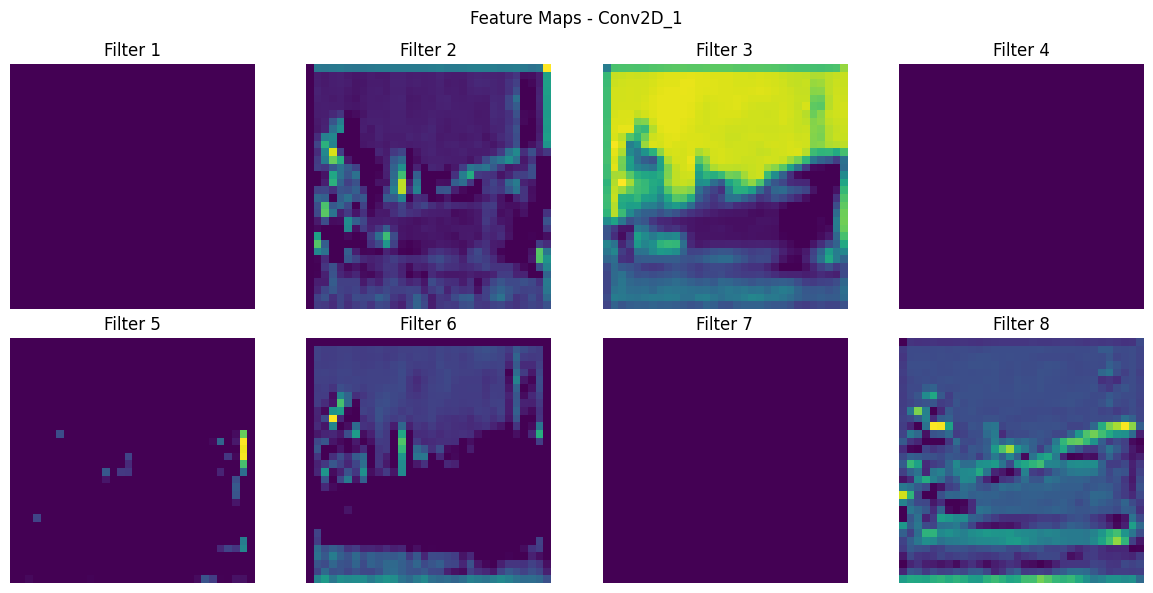

Visualizando Conv2D_2: shape (1, 32, 32, 32)


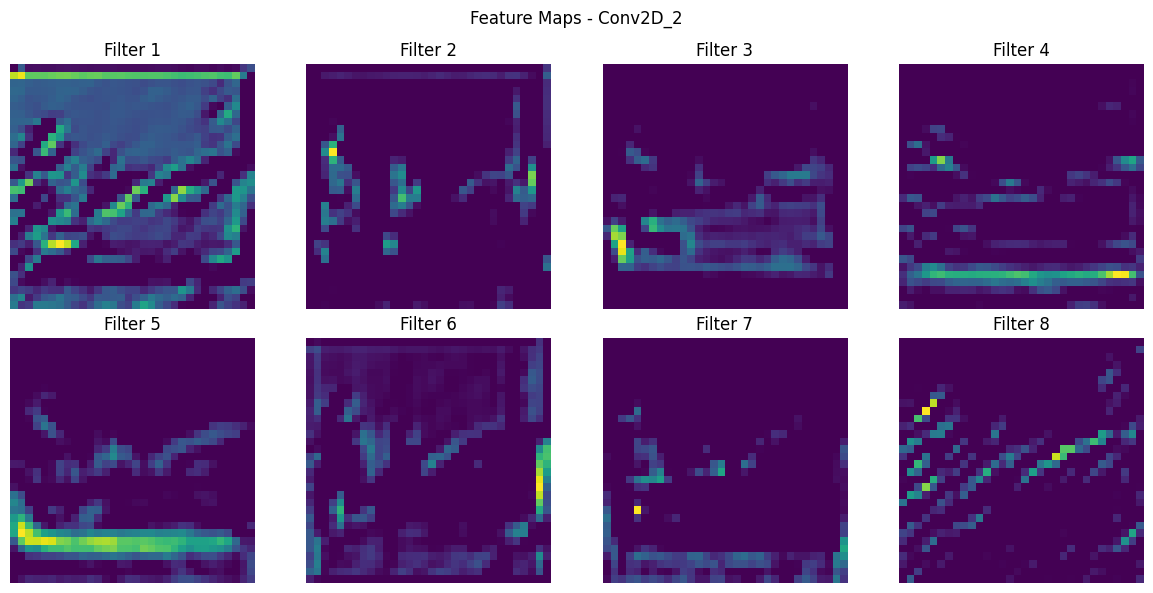

Visualizando Conv2D_3: shape (1, 16, 16, 64)


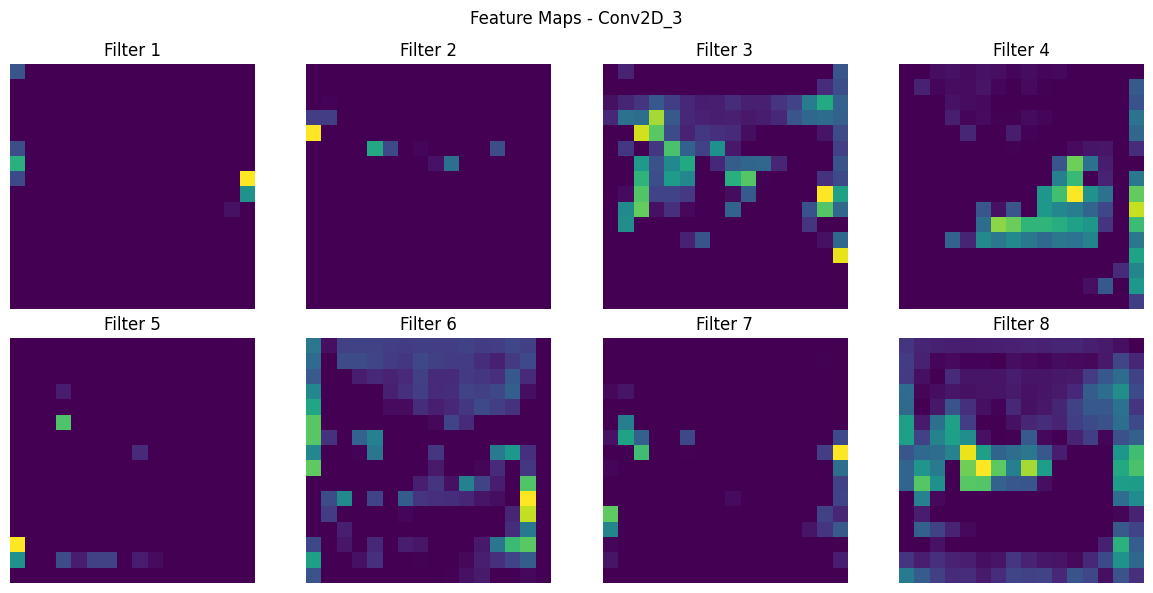

Visualizando Conv2D_4: shape (1, 16, 16, 64)


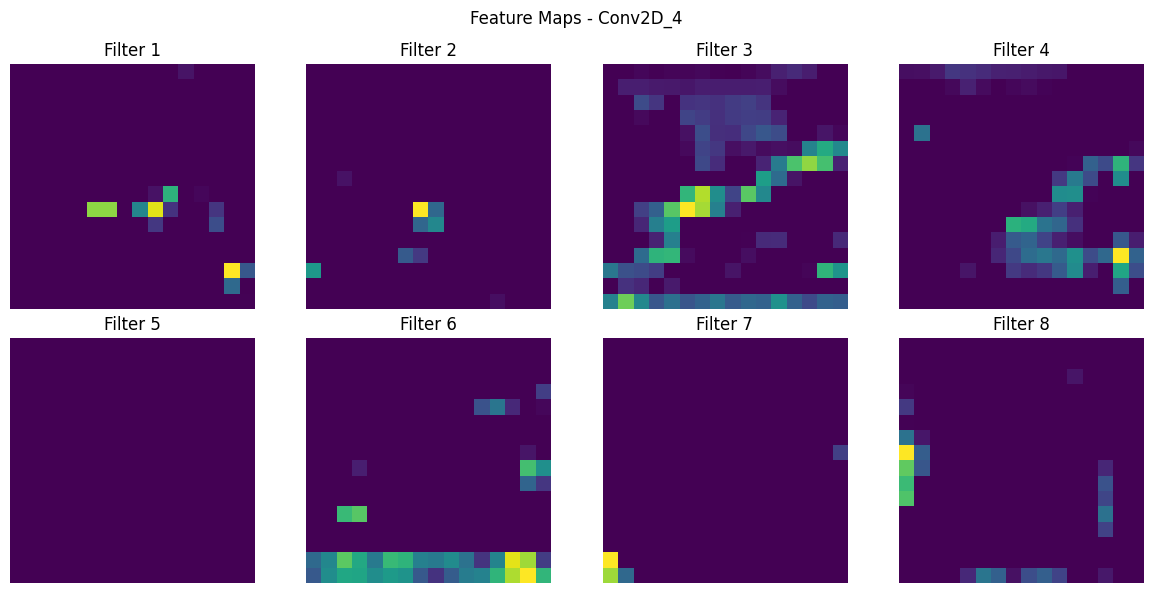

Visualização das feature maps do Model1 completada!


In [31]:
# Visualização das Feature Maps do Model1 - Execute após compilar o modelo
# Simplified approach that should work after model compilation
try:
    # Get a test image first
    test_image = X_test[2:3].astype("float32")
    
    # Make a prediction to ensure model is built
    prediction = model1.predict(test_image, verbose=0)
    print(f"Modelo model1 funcionou! Predição shape: {prediction.shape}")
    
    # Now get layer outputs for visualization
    conv_layer_names = []
    conv_outputs = []
    
    # Get all convolutional layers
    for i, layer in enumerate(model1.layers):
        if hasattr(layer, 'filters'):  # This identifies Conv2D layers
            conv_layer_names.append(f"{layer.name} (layer {i+1})")
            
    print(f"Camadas convolucionais encontradas: {len(conv_layer_names)}")
    print("Nomes das camadas:", conv_layer_names)
    
    # Alternative approach: use subclassing to create a model that outputs intermediate results
    if len(conv_layer_names) > 0:
        print("Criando modelo personalizado para visualização...")
        
        # Create a functional model that can access intermediate layers
        input_layer = tf.keras.Input(shape=(32, 32, 3))
        x = input_layer
        
        # Recreate the first few layers to match model1 structure
        x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        conv1_output = x
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(0.25)(x, training=False)
        
        x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        conv2_output = x
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.MaxPooling2D(2, 2)(x)
        
        x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        conv3_output = x
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(0.25)(x, training=False)
        
        x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        conv4_output = x
        
        # Create visualization model
        vis_model = tf.keras.Model(
            inputs=input_layer, 
            outputs=[conv1_output, conv2_output, conv3_output, conv4_output]
        )
        
        # Copy weights from model1 to visualization model
        try:
            for i, layer in enumerate(vis_model.layers):
                if hasattr(layer, 'get_weights') and len(layer.get_weights()) > 0:
                    # Find corresponding layer in model1
                    for orig_layer in model1.layers:
                        if (type(layer) == type(orig_layer) and 
                            hasattr(orig_layer, 'get_weights') and 
                            len(orig_layer.get_weights()) > 0):
                            try:
                                layer.set_weights(orig_layer.get_weights())
                                break
                            except:
                                continue
            
            # Get feature maps
            feature_maps = vis_model.predict(test_image, verbose=0)
            
            # Visualize each output
            layer_names = ['Conv2D_1', 'Conv2D_2', 'Conv2D_3', 'Conv2D_4']
            for idx, (feature_map, layer_name) in enumerate(zip(feature_maps, layer_names)):
                print(f"Visualizando {layer_name}: shape {feature_map.shape}")
                
                # Show first 8 feature maps
                n_features = min(feature_map.shape[-1], 8)
                fig, axes = plt.subplots(2, 4, figsize=(12, 6))
                fig.suptitle(f'Feature Maps - {layer_name}')
                
                for i in range(n_features):
                    row = i // 4
                    col = i % 4
                    axes[row, col].imshow(feature_map[0, :, :, i], cmap='viridis')
                    axes[row, col].axis('off')
                    axes[row, col].set_title(f'Filter {i+1}')
                
                # Hide unused subplots
                for i in range(n_features, 8):
                    row = i // 4
                    col = i % 4
                    axes[row, col].axis('off')
                
                plt.tight_layout()
                plt.show()
            
        except Exception as weight_error:
            print(f"Erro ao copiar pesos: {weight_error}")
            print("Mostrando feature maps com pesos aleatórios para demonstração...")
            
            # Even with random weights, show the structure
            feature_maps = vis_model.predict(test_image, verbose=0)
            layer_names = ['Conv2D_1', 'Conv2D_2', 'Conv2D_3', 'Conv2D_4']
            
            # Just show the first feature map to demonstrate structure
            feature_map = feature_maps[0]  # First conv layer output
            print(f"Exemplo - {layer_names[0]}: shape {feature_map.shape}")
            
            fig, axes = plt.subplots(2, 4, figsize=(12, 6))
            fig.suptitle(f'Feature Maps - {layer_names[0]} (exemplo)')
            
            for i in range(8):
                row = i // 4
                col = i % 4
                axes[row, col].imshow(feature_map[0, :, :, i], cmap='viridis')
                axes[row, col].axis('off')
                axes[row, col].set_title(f'Filter {i+1}')
            
            plt.tight_layout()
            plt.show()
    
    print("Visualização das feature maps do Model1 completada!")
    
except Exception as e:
    print(f"Erro na visualização: {e}")
    import traceback
    traceback.print_exc()

In [30]:
# Criando o Callback (model1)

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [31]:
# Fazendo o Treinamento

history1 = model1.fit(datagen.flow(X_train, y_train, batch_size = 20), steps_per_epoch = 2000, epochs = 16, validation_data = (X_val, y_val), validation_steps = 500, callbacks = callback)

Epoch 1/16


2025-11-09 09:04:15.898660: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1771', 8 bytes spill stores, 8 bytes spill loads



2000/2000 ━━━━━━━━━━━━━━━━━━━━ 63s 29ms/step - accuracy: 0.4287 - loss: 1.6344 - val_accuracy: 0.5880 - val_loss: 1.1739 - learning_rate: 0.0010
Epoch 2/16
 495/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5370 - loss: 1.3145

/home/wsl/anaconda3/envs/myenv4/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5438 - loss: 1.2900 - val_accuracy: 0.4950 - val_loss: 1.5711 - learning_rate: 0.0010
Epoch 3/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5943 - loss: 1.1586 - val_accuracy: 0.6682 - val_loss: 1.0071 - learning_rate: 0.0010
Epoch 4/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6172 - loss: 1.0950 - val_accuracy: 0.6492 - val_loss: 1.1437 - learning_rate: 0.0010
Epoch 5/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6425 - loss: 1.0338 - val_accuracy: 0.6720 - val_loss: 1.0154 - learning_rate: 0.0010
Epoch 6/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6628 - loss: 0.9897 - val_accuracy: 0.6868 - val_loss: 0.9223 - learning_rate: 0.0010
Epoch 7/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6651 - loss: 0.9745 - val_accuracy: 0.6848 - val_loss: 1.0022 - learning_rate: 0.0010
Epoch 8/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6801 - loss: 0.9

In [32]:
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

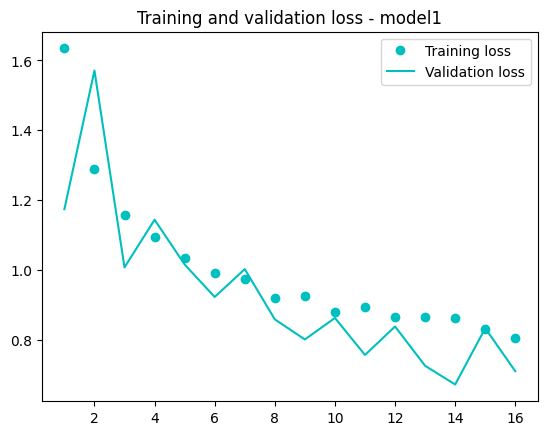

In [33]:
epochs1 = range(1, len(acc1) + 1)

plt.plot(epochs1, loss1, 'co', label='Training loss')
plt.plot(epochs1, val_loss1, 'c', label='Validation loss')
plt.title('Training and validation loss - model1')
plt.legend()
plt.show()

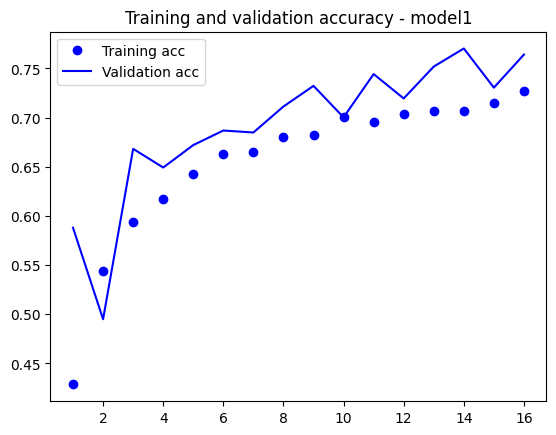

In [34]:
plt.plot(epochs1, acc1, 'bo', label='Training acc')
plt.plot(epochs1, val_acc1, 'b', label='Validation acc')
plt.title('Training and validation accuracy - model1')
plt.legend()
plt.show()

In [35]:
# Testando (model1)

test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
test_loss1, test_acc1

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7630 - loss: 0.6776


(0.6775894165039062, 0.7630000114440918)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


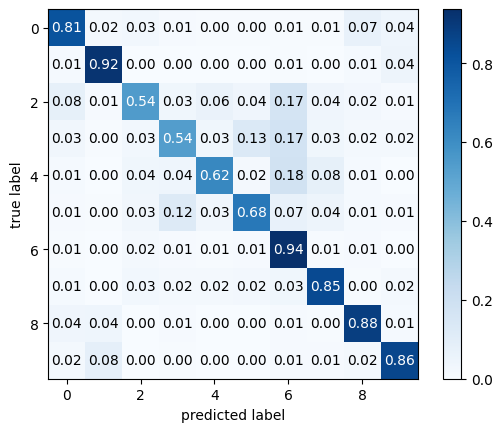

In [36]:
#matriz de confusão model1
y_pred1 = model1.predict(X_test)
y_test.argmax(axis=1).shape, y_pred1.argmax(axis=1).shape

multiclass1 = confusion_matrix(y_test.argmax(axis=1), y_pred1.argmax(axis=1))
class_names1 = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, ax1 = plot_confusion_matrix(multiclass1, colorbar=True, show_absolute=False, show_normed=True)
ax1.margins(10,10) #just change the values til adjust to your screen.
plt.show()

Parte referente ao modelo 2 (model2)

In [37]:
# Construindo o modelo CNN (model2)

model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(2, 2))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation = 'relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation = 'softmax'))

/home/wsl/anaconda3/envs/myenv4/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,658 (2.04 MB)

 Trainable params: 535,402 (2.04 MB)

 Non-trainable params: 256 (1.00 KB)

In [39]:
# Compilando o modelo (model1)

model2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Modelo model2 funcionou! Predição shape: (1, 10)
Camadas convolucionais encontradas: 2
Nomes das camadas: ['conv2d_10 (layer 1)', 'conv2d_11 (layer 4)']
Criando modelo personalizado para visualização...
Visualizando Conv2D_1: shape (1, 32, 32, 32)


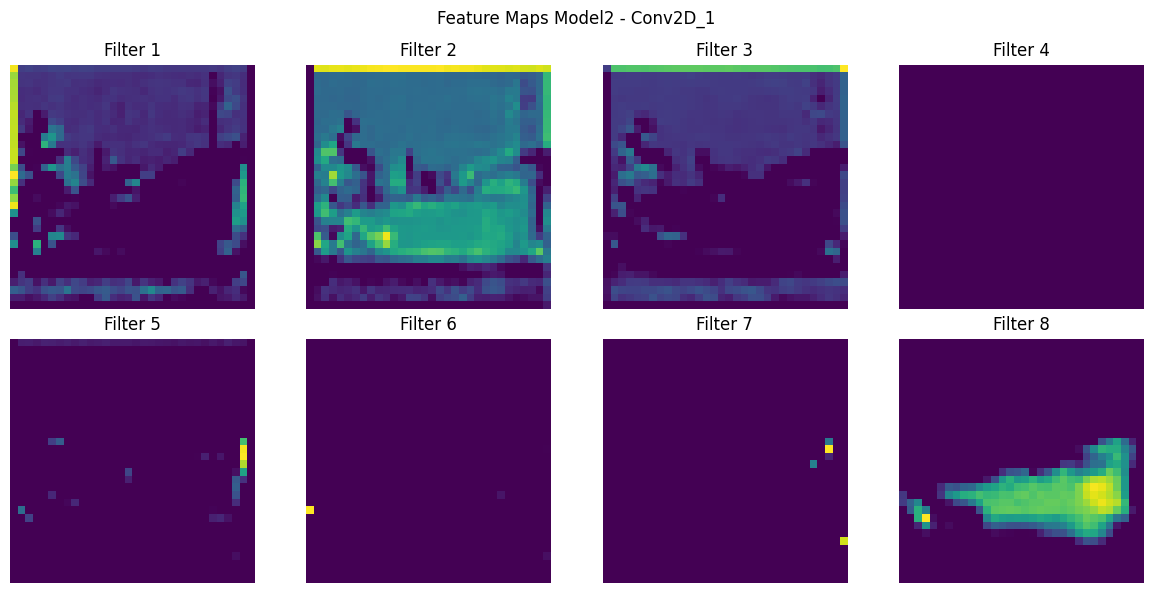

Visualizando Conv2D_2: shape (1, 32, 32, 32)


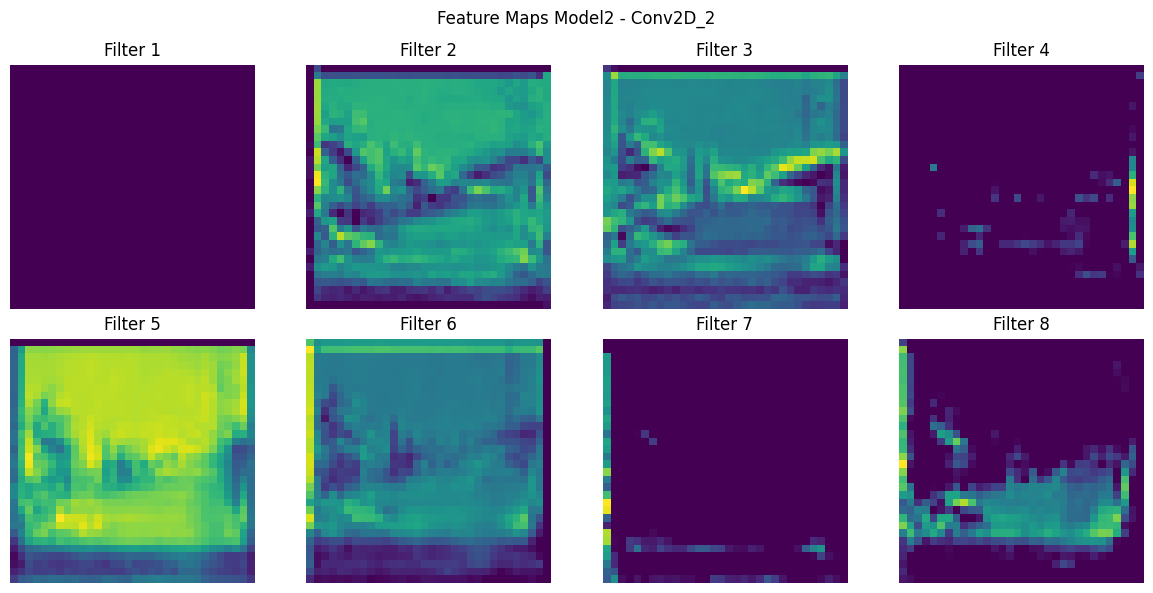

Visualização das feature maps do Model2 completada!


In [35]:
# Visualização das Feature Maps do Model2 - Execute após compilar o modelo
# Simplified approach that should work after model compilation
try:
    # Get a test image first
    test_image = X_test[2:3].astype("float32")
    
    # Make a prediction to ensure model is built
    prediction = model2.predict(test_image, verbose=0)
    print(f"Modelo model2 funcionou! Predição shape: {prediction.shape}")
    
    # Now get layer outputs for visualization
    conv_layer_names = []
    conv_outputs = []
    
    # Get all convolutional layers
    for i, layer in enumerate(model2.layers):
        if hasattr(layer, 'filters'):  # This identifies Conv2D layers
            conv_layer_names.append(f"{layer.name} (layer {i+1})")
            
    print(f"Camadas convolucionais encontradas: {len(conv_layer_names)}")
    print("Nomes das camadas:", conv_layer_names)
    
    # Alternative approach: use subclassing to create a model that outputs intermediate results
    if len(conv_layer_names) > 0:
        print("Criando modelo personalizado para visualização...")
        
        # Create a functional model that can access intermediate layers
        input_layer = tf.keras.Input(shape=(32, 32, 3))
        x = input_layer
        
        # Recreate the first few layers to match model2 structure (simpler than model1)
        x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        conv1_output = x
        x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.layers.Dropout(0.25)(x, training=False)
        
        x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        conv2_output = x
        
        # Create visualization model (model2 has only 2 conv layers)
        vis_model = tf.keras.Model(
            inputs=input_layer, 
            outputs=[conv1_output, conv2_output]
        )
        
        # Copy weights from model2 to visualization model
        try:
            for i, layer in enumerate(vis_model.layers):
                if hasattr(layer, 'get_weights') and len(layer.get_weights()) > 0:
                    # Find corresponding layer in model2
                    for orig_layer in model2.layers:
                        if (type(layer) == type(orig_layer) and 
                            hasattr(orig_layer, 'get_weights') and 
                            len(orig_layer.get_weights()) > 0):
                            try:
                                layer.set_weights(orig_layer.get_weights())
                                break
                            except:
                                continue
            
            # Get feature maps
            feature_maps = vis_model.predict(test_image, verbose=0)
            
            # Visualize each output
            layer_names = ['Conv2D_1', 'Conv2D_2']
            for idx, (feature_map, layer_name) in enumerate(zip(feature_maps, layer_names)):
                print(f"Visualizando {layer_name}: shape {feature_map.shape}")
                
                # Show first 8 feature maps
                n_features = min(feature_map.shape[-1], 8)
                fig, axes = plt.subplots(2, 4, figsize=(12, 6))
                fig.suptitle(f'Feature Maps Model2 - {layer_name}')
                
                for i in range(n_features):
                    row = i // 4
                    col = i % 4
                    axes[row, col].imshow(feature_map[0, :, :, i], cmap='viridis')
                    axes[row, col].axis('off')
                    axes[row, col].set_title(f'Filter {i+1}')
                
                # Hide unused subplots
                for i in range(n_features, 8):
                    row = i // 4
                    col = i % 4
                    axes[row, col].axis('off')
                
                plt.tight_layout()
                plt.show()
            
        except Exception as weight_error:
            print(f"Erro ao copiar pesos: {weight_error}")
            print("Mostrando feature maps com pesos aleatórios para demonstração...")
            
            # Even with random weights, show the structure
            feature_maps = vis_model.predict(test_image, verbose=0)
            layer_names = ['Conv2D_1', 'Conv2D_2']
            
            # Just show the first feature map to demonstrate structure
            feature_map = feature_maps[0]  # First conv layer output
            print(f"Exemplo - {layer_names[0]}: shape {feature_map.shape}")
            
            fig, axes = plt.subplots(2, 4, figsize=(12, 6))
            fig.suptitle(f'Feature Maps Model2 - {layer_names[0]} (exemplo)')
            
            for i in range(8):
                row = i // 4
                col = i % 4
                axes[row, col].imshow(feature_map[0, :, :, i], cmap='viridis')
                axes[row, col].axis('off')
                axes[row, col].set_title(f'Filter {i+1}')
            
            plt.tight_layout()
            plt.show()
    
    print("Visualização das feature maps do Model2 completada!")
    
except Exception as e:
    print(f"Erro na visualização: {e}")
    import traceback
    traceback.print_exc()

In [40]:
# Criando o Callback (model1)

callback = [ReduceLROnPlateau(monitor = 'val_loss', patience = 2, factor = 0.1, min_lr = 0.001)]

In [41]:
# Fazendo o Treinamento

history2 = model2.fit(datagen.flow(X_train, y_train, batch_size = 20), steps_per_epoch = 2000, epochs = 16, validation_data = (X_val, y_val), validation_steps = 500, callbacks = callback)

Epoch 1/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.3925 - loss: 1.7116 - val_accuracy: 0.5350 - val_loss: 1.3509 - learning_rate: 0.0010
Epoch 2/16
 500/2000 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4869 - loss: 1.4559

/home/wsl/anaconda3/envs/myenv4/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4808 - loss: 1.4610 - val_accuracy: 0.5394 - val_loss: 1.3458 - learning_rate: 0.0010
Epoch 3/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5107 - loss: 1.3852 - val_accuracy: 0.5866 - val_loss: 1.1916 - learning_rate: 0.0010
Epoch 4/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5414 - loss: 1.3202 - val_accuracy: 0.6108 - val_loss: 1.2171 - learning_rate: 0.0010
Epoch 5/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5447 - loss: 1.2991 - val_accuracy: 0.6042 - val_loss: 1.3161 - learning_rate: 0.0010
Epoch 6/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5532 - loss: 1.2902 - val_accuracy: 0.6172 - val_loss: 1.1095 - learning_rate: 0.0010
Epoch 7/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5658 - loss: 1.2535 - val_accuracy: 0.5492 - val_loss: 1.4079 - learning_rate: 0.0010
Epoch 8/16
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5657 - loss: 1.2

In [42]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

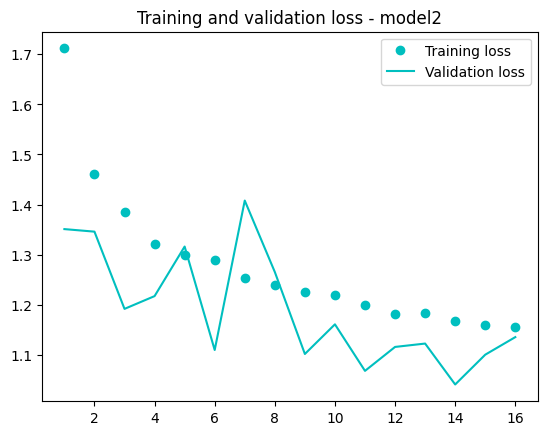

In [43]:
epochs2 = range(1, len(acc2) + 1)

plt.plot(epochs2, loss2, 'co', label='Training loss')
plt.plot(epochs2, val_loss2, 'c', label='Validation loss')
plt.title('Training and validation loss - model2')
plt.legend()
plt.show()

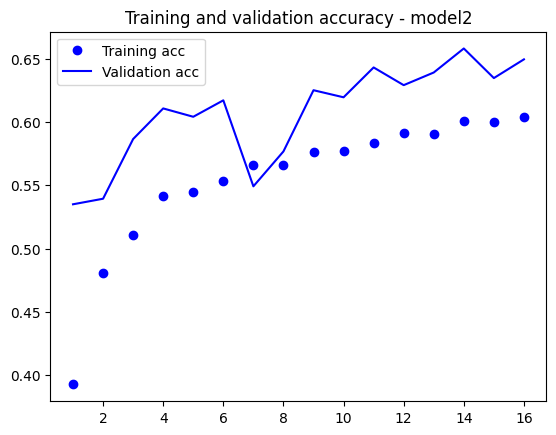

In [44]:
plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy - model2')
plt.legend()
plt.show()

In [45]:
# Testando

test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
test_loss2, test_acc2

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6432 - loss: 1.1213


(1.1212787628173828, 0.6431999802589417)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


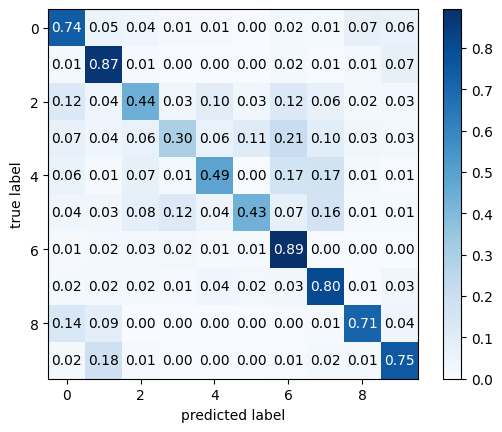

In [46]:
#matriz de confusão model2
y_pred2 = model2.predict(X_test)
y_test.argmax(axis=1).shape, y_pred2.argmax(axis=1).shape

multiclass2 = confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1))
class_names2 = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, ax2 = plot_confusion_matrix(multiclass2, colorbar=True, show_absolute=False, show_normed=True)
ax2.margins(10,10) #just change the values til adjust to your screen.
plt.show()